In [1]:
# NOTES

# get data
# clean data, dropping any rows and columns that need to be dropped (1): outliers, NaN
# select features (could postpone this)
# X/y split
# Train/Test split
# split both Train and Test in numericals and categoricals
# transformations on numericals:
#     fit ONLY on numericals_train
#     transform BOTH numericals_train and numericals_test
# encoding categoricals
#     fit ONLY on categricals_train
#     encode BOTH categoricals_train and categoricals_test
# combine numericals_train and categoricals_train into train_processed
# combine numericals_test and categoricals_test into test_processed
# define model
# fit model on train_processed
# evaluate (score) model on test_processed + sanity check

# save model and transformers/encoders (2)

# For unseen data:
# drop columns and rows according to the criteria used in (1)
# split in cnumericals and categoricals
# transform numericals and encode categoricals using transformers/encoders saved in (2)
# make predictions using model saved in (2)

# Import necessary libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# Mysql connection
import pymysql #for getting data from a sql database
from sqlalchemy import create_engine #for establishing the connection and authentication
from getpass import getpass  # To get the password without showing the input

# Hypothesis testing
import scipy.stats
from scipy.stats import ttest_1samp

# Sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample # Oversampling

import matplotlib.pyplot as plt

# Max columns_rows
pd.set_option('display.max_columns', 165)
pd.set_option('display.max_rows', 165)

# Get data

In [2]:
# I found this data from Kaggle website.
data = pd.read_csv('weather_prediction_dataset.csv')
data

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_wind_gust,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MALMO_wind_speed,MALMO_precipitation,MALMO_temp_mean,MALMO_temp_min,MALMO_temp_max,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,0.92,1.0268,0.52,0.00,3.7,-4.9,-0.7,7,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1,8,3.2,7.2,0.89,0.09,0.32,0.0,1.0,-1.8,2.0,8,2.5,5.9,0.92,1.0240,0.12,0.22,0.0,4.2,2.5,6.9,7,0.94,1.0245,0.18,0.00,0.4,7.0,4.9,10.8,2.5,8.2,0.93,1.0237,0.06,0.13,0.0,3.5,1.5,5.0,6,0.4,0.83,1.0294,0.57,0.00,5.2,-4.8,-9.1,-1.3,8,3.1,7.0,0.98,1.0251,0.06,0.17,0.0,5.6,4.1,6.9,2.5,0.27,2.9,0.9,3.6,3.8,0.85,1.0269,0.30,0.00,5.5,2.5,8.5,8,2.6,9.4,0.91,1.0273,0.20,0.20,0.0,1.7,-0.5,2.6,7,0.9,5.1,0.94,1.0130,0.04,0.60,0.0,-5.0,-8.6,-3.2,4.4,0.71,1.0267,0.60,0.00,12.2,10.3,14.0,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0,7,0.89,0.82,1.34,0.0,-15.2,-17.0,-13.4,8,1.0163,0.17,0.0,-2.3,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,0.94,1.0297,0.14,0.00,0.4,-3.6,-1

# EDA

In [3]:
data.shape

(3654, 165)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [5]:
data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max,DE_BILT_cloud_cover,DE_BILT_wind_speed,DE_BILT_wind_gust,DE_BILT_humidity,DE_BILT_pressure,DE_BILT_global_radiation,DE_BILT_precipitation,DE_BILT_sunshine,DE_BILT_temp_mean,DE_BILT_temp_min,DE_BILT_temp_max,DRESDEN_cloud_cover,DRESDEN_wind_speed,DRESDEN_wind_gust,DRESDEN_humidity,DRESDEN_global_radiation,DRESDEN_precipitation,DRESDEN_sunshine,DRESDEN_temp_mean,DRESDEN_temp_min,DRESDEN_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_wind_gust,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_wind_gust,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MALMO_wind_speed,MALMO_precipitation,MALMO_temp_mean,MALMO_temp_min,MALMO_temp_max,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,MUENCHEN_cloud_cover,MUENCHEN_wind_speed,MUENCHEN_wind_gust,MUENCHEN_humidity,MUENCHEN_pressure,MUENCHEN_global_radiation,MUENCHEN_precipitation,MUENCHEN_sunshine,MUENCHEN_temp_mean,MUENCHEN_temp_min,MUENCHEN_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_wind_gust,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,PERPIGNAN_pressure,PERPIGNAN_global_radiation,PERPIGNAN_precipitation,PERPIGNAN_temp_mean,PERPIGNAN_temp_min,PERPIGNAN_temp_max,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.00000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.0000

In [6]:
# Although there is no NaN value, the raw dataframe has missing columns for some cities.
data.isna().sum()/len(data)

DATE                           0.0
MONTH                          0.0
BASEL_cloud_cover              0.0
BASEL_humidity                 0.0
BASEL_pressure                 0.0
BASEL_global_radiation         0.0
BASEL_precipitation            0.0
BASEL_sunshine                 0.0
BASEL_temp_mean                0.0
BASEL_temp_min                 0.0
BASEL_temp_max                 0.0
BUDAPEST_cloud_cover           0.0
BUDAPEST_humidity              0.0
BUDAPEST_pressure              0.0
BUDAPEST_global_radiation      0.0
BUDAPEST_precipitation         0.0
BUDAPEST_sunshine              0.0
BUDAPEST_temp_mean             0.0
BUDAPEST_temp_max              0.0
DE_BILT_cloud_cover            0.0
DE_BILT_wind_speed             0.0
DE_BILT_wind_gust              0.0
DE_BILT_humidity               0.0
DE_BILT_pressure               0.0
DE_BILT_global_radiation       0.0
DE_BILT_precipitation          0.0
DE_BILT_sunshine               0.0
DE_BILT_temp_mean              0.0
DE_BILT_temp_min    

# Verticalization of dataframe

In [7]:
# Weather data is distributed in 165 columns for 18 cities. 
# I splitted the dataframe into 10 datasets for each city that I will work in this project. 
# I will work on data of German cities (Dusseldorf and Muenchen) in the whole project. 
# I will also work on data of Dresden, De bilt, Heathrow, Kassel, Maastricht, Oslo, Stockholm, Tours cities in data cleaning part of the project. 
# At this step, I concatenate the datasets by rows. Name of new dataset is weather.

In [8]:
de_bilt=data[['DATE','MONTH','DE_BILT_cloud_cover','DE_BILT_wind_speed','DE_BILT_wind_gust','DE_BILT_humidity','DE_BILT_pressure','DE_BILT_global_radiation','DE_BILT_precipitation','DE_BILT_sunshine','DE_BILT_temp_mean','DE_BILT_temp_min', 'DE_BILT_temp_max']]
de_bilt.columns = ['DATE','MONTH','cloud_cover','wind_speed','wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
de_bilt.shape

(3654, 13)

In [9]:
dresden=data[['DATE','MONTH','DRESDEN_cloud_cover','DRESDEN_wind_speed','DRESDEN_wind_gust','DRESDEN_humidity','DRESDEN_global_radiation','DRESDEN_precipitation','DRESDEN_sunshine','DRESDEN_temp_mean','DRESDEN_temp_min','DRESDEN_temp_max']]
dresden.columns = ['DATE','MONTH','cloud_cover','wind_speed','wind_gust', 'humidity', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
dresden.shape

(3654, 12)

In [10]:
dusseldorf=data[['DATE','MONTH','DUSSELDORF_cloud_cover','DUSSELDORF_wind_speed','DUSSELDORF_wind_gust','DUSSELDORF_humidity','DUSSELDORF_pressure','DUSSELDORF_global_radiation','DUSSELDORF_precipitation','DUSSELDORF_sunshine','DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max']]
dusseldorf.columns = ['DATE','MONTH','cloud_cover','wind_speed','wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
dusseldorf.shape

(3654, 13)

In [11]:
# dusseldorf_logistic will be used in logistic regression and oversampling.
dusseldorf_logistic = dusseldorf 

In [12]:
heathrow=data[['DATE','MONTH','HEATHROW_cloud_cover','HEATHROW_humidity','HEATHROW_pressure','HEATHROW_global_radiation','HEATHROW_precipitation','HEATHROW_sunshine','HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max']]
heathrow.columns = ['DATE','MONTH','cloud_cover', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
heathrow.shape

(3654, 11)

In [13]:
kassel=data[['DATE','MONTH','KASSEL_wind_speed','KASSEL_wind_gust','KASSEL_humidity','KASSEL_pressure','KASSEL_global_radiation','KASSEL_precipitation','KASSEL_sunshine','KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max']]
kassel.columns = ['DATE','MONTH','wind_speed','wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
kassel.shape

(3654, 12)

In [14]:
maastricht=data[['DATE','MONTH','MAASTRICHT_cloud_cover','MAASTRICHT_wind_speed','MAASTRICHT_wind_gust','MAASTRICHT_humidity','MAASTRICHT_pressure','MAASTRICHT_global_radiation','MAASTRICHT_precipitation','MAASTRICHT_sunshine','MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max']]
maastricht.columns = ['DATE','MONTH','cloud_cover','wind_speed', 'wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine', 'temp_mean','temp_min','temp_max']
maastricht.shape

(3654, 13)

In [15]:
muenchen=data[['DATE','MONTH','MUENCHEN_cloud_cover','MUENCHEN_wind_speed','MUENCHEN_wind_gust','MUENCHEN_humidity','MUENCHEN_pressure','MUENCHEN_global_radiation','MUENCHEN_precipitation','MUENCHEN_sunshine','MUENCHEN_temp_mean','MUENCHEN_temp_min','MUENCHEN_temp_max']]
muenchen.columns = ['DATE','MONTH','cloud_cover','wind_speed','wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine','temp_mean','temp_min','temp_max']
muenchen.shape

(3654, 13)

In [16]:
oslo=data[['DATE','MONTH','OSLO_cloud_cover','OSLO_wind_speed','OSLO_wind_gust','OSLO_humidity','OSLO_pressure','OSLO_global_radiation','OSLO_precipitation','OSLO_sunshine','OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max']]
oslo.columns = ['DATE','MONTH','cloud_cover','wind_speed','wind_gust', 'humidity','pressure', 'global_radiation', 'precipitation','sunshine','temp_mean','temp_min','temp_max']
oslo.shape

(3654, 13)

In [17]:
stockholm=data[['DATE','MONTH','STOCKHOLM_cloud_cover','STOCKHOLM_pressure','STOCKHOLM_precipitation','STOCKHOLM_sunshine','STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max']]
stockholm.columns = ['DATE','MONTH','cloud_cover', 'pressure', 'precipitation', 'sunshine', 'temp_mean','temp_min','temp_max']
stockholm.shape

(3654, 9)

In [18]:
tours=data[['DATE','MONTH','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max']]
tours.columns = ['DATE','MONTH','wind_speed','humidity', 'pressure','global_radiation', 'precipitation', 'temp_mean','temp_min','temp_max']
tours.shape

(3654, 10)

In [19]:
weather = pd.concat([de_bilt, dresden, dusseldorf, heathrow, kassel, maastricht, muenchen, oslo, stockholm, tours], axis=0)
weather = weather.reset_index()
weather

# NaN values can be seen in weather dataframe after concatenation.

,index,DATE,MONTH,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,0,20000101,1,7.0,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1
1,1,20000102,1,8.0,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7
2,2,20000103,1,8.0,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6
3,3,20000104,1,7.0,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4
4,4,20000105,1,3.0,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36535,3649,20091228,12,NaN,3.7,NaN,0.95,1.0011,0.22,1.50,NaN,6.2,1.8,10.6
36536,3650,20091229,12,NaN,5.3,NaN,0.89,0.9966,0.24,0.40,NaN,10.4,6.2,14.5
36537,3651,20091230,12,NaN,3.8,NaN,0.88,0.9939,0.24,1.00,NaN,10.0,8.7,11.3
36538,3652,20091231,12,NaN,4.2,NaN,0.88,0.9933,0.58,0.02,NaN,8.5,6.2,10.9


# Lower case with underscores

In [20]:
cols = []
for column in weather.columns:
    cols.append(column.lower().replace(' ','_'))
cols
weather.columns = cols

weather.head(5)

,index,date,month,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,0,20000101,1,7.0,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1
1,1,20000102,1,8.0,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7
2,2,20000103,1,8.0,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6
3,3,20000104,1,7.0,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4
4,4,20000105,1,3.0,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4


# Drop unnecessary columns

In [21]:
weather = weather.drop(['index'], axis=1)
weather.head()

,date,month,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,20000101,1,7.0,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1
1,20000102,1,8.0,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7
2,20000103,1,8.0,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6
3,20000104,1,7.0,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4
4,20000105,1,3.0,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4


# Date and month columns

In [22]:
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d') # convert date into datetime

In [23]:
weather['month'] = weather['month'].astype('object') # The month column is treated as categorical

In [24]:
weather.dtypes

date                datetime64[ns]
month                       object
cloud_cover                float64
wind_speed                 float64
wind_gust                  float64
humidity                   float64
pressure                   float64
global_radiation           float64
precipitation              float64
sunshine                   float64
temp_mean                  float64
temp_min                   float64
temp_max                   float64
dtype: object

In [25]:
weather.head()

,date,month,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_min,temp_max
0,2000-01-01,1,7.0,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,6.1,3.5,8.1
1,2000-01-02,1,8.0,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,7.3,5.4,8.7
2,2000-01-03,1,8.0,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,8.4,6.4,9.6
3,2000-01-04,1,7.0,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,6.4,4.3,9.4
4,2000-01-05,1,3.0,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,4.4,1.4,7.4


# City column

In [26]:
weather.insert(loc=1,
          column='city',
          value='default')

In [27]:
weather.columns

Index(['date', 'city', 'month', 'cloud_cover', 'wind_speed', 'wind_gust',
       'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine',
       'temp_mean', 'temp_min', 'temp_max'],
      dtype='object')

In [28]:
# After verticalization of the old database, name of the cities are distributed 
# within city column for each 3654 row in the weather dataframe.

for i in range(len(weather['city'])):
    if i < 3654:
        weather['city'][i]='De bilt'
    elif i >= 3654 and i < 3654*2:
        weather['city'][i]='Dresden'
    elif i >= 3654*2 and i < 3654*3:
        weather['city'][i]='Dusseldorf'
    elif i >= 3654*3 and i < 3654*4:
        weather['city'][i]='Heathrow'
    elif i >= 3654*4 and i < 3654*5:
        weather['city'][i]='Kassel'
    elif i >= 3654*8 and i < 3654*6:
        weather['city'][i]='Maastricht'
    elif i >= 3654*11 and i < 3654*7:
        weather['city'][i]='Muenchen'
    elif i >= 3654*12 and i < 3654*8:
        weather['city'][i]='Oslo'
    elif i >= 3654*16 and i < 3654*9:
        weather['city'][i]='Stockholm'
    else:
        weather['city'][i]='Tours'

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_755/2617612444.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['city'][i]='De bilt'
/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_755/2617612444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['city'][i]='Dresden'
/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_755/2617612444.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  we

In [29]:
# Rearrange the columns in weather dataframe
weather = weather[['date','month', 'city', 'cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'global_radiation',
       'precipitation', 'sunshine', 'temp_min', 'temp_max', 'temp_mean']]

weather

,date,month,city,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,2000-01-01,1,De bilt,7.0,2.5,8.0,0.97,1.0240,0.11,0.10,0.0,3.5,8.1,6.1
1,2000-01-02,1,De bilt,8.0,3.7,9.0,0.97,1.0267,0.11,0.00,0.0,5.4,8.7,7.3
2,2000-01-03,1,De bilt,8.0,6.1,13.0,0.94,1.0203,0.11,0.45,0.0,6.4,9.6,8.4
3,2000-01-04,1,De bilt,7.0,3.8,15.0,0.94,1.0142,0.11,1.09,0.0,4.3,9.4,6.4
4,2000-01-05,1,De bilt,3.0,4.0,12.0,0.90,1.0183,0.48,0.00,6.5,1.4,7.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36535,2009-12-28,12,Tours,NaN,3.7,NaN,0.95,1.0011,0.22,1.50,NaN,1.8,10.6,6.2
36536,2009-12-29,12,Tours,NaN,5.3,NaN,0.89,0.9966,0.24,0.40,NaN,6.2,14.5,10.4
36537,2009-12-30,12,Tours,NaN,3.8,NaN,0.88,0.9939,0.24,1.00,NaN,8.7,11.3,10.0
36538,2009-12-31,12,Tours,NaN,4.2,NaN,0.88,0.9933,0.58,0.02,NaN,6.2,10.9,8.5


# Remove NaN values

In [30]:
# Check for NaN values (%) in weather dataframe
weather.isna().sum()/len(weather)/0.01

date                 0.0
month                0.0
city                 0.0
cloud_cover         20.0
wind_speed          20.0
wind_gust           30.0
humidity            10.0
pressure            10.0
global_radiation    10.0
precipitation        0.0
sunshine            10.0
temp_min             0.0
temp_max             0.0
temp_mean            0.0
dtype: float64

In [31]:
# strategy: impute the mean value for the missing value 
def NaN(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            mean_col = df[col].mean()
            df[col] = df[col].fillna(mean_col)
    return df

NaN(weather)

,date,month,city,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,2000-01-01,1,De bilt,7.00000,2.5,8.000000,0.97,1.0240,0.11,0.10,0.000000,3.5,8.1,6.1
1,2000-01-02,1,De bilt,8.00000,3.7,9.000000,0.97,1.0267,0.11,0.00,0.000000,5.4,8.7,7.3
2,2000-01-03,1,De bilt,8.00000,6.1,13.000000,0.94,1.0203,0.11,0.45,0.000000,6.4,9.6,8.4
3,2000-01-04,1,De bilt,7.00000,3.8,15.000000,0.94,1.0142,0.11,1.09,0.000000,4.3,9.4,6.4
4,2000-01-05,1,De bilt,3.00000,4.0,12.000000,0.90,1.0183,0.48,0.00,6.500000,1.4,7.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36535,2009-12-28,12,Tours,5.31746,3.7,10.060869,0.95,1.0011,0.22,1.50,4.697443,1.8,10.6,6.2
36536,2009-12-29,12,Tours,5.31746,5.3,10.060869,0.89,0.9966,0.24,0.40,4.697443,6.2,14.5,10.4
36537,2009-12-30,12,Tours,5.31746,3.8,10.060869,0.88,0.9939,0.24,1.00,4.697443,8.7,11.3,10.0
36538,2009-12-31,12,Tours,5.31746,4.2,10.060869,0.88,0.9933,0.58,0.02,4.697443,6.2,10.9,8.5


In [32]:
weather.isna().sum()/len(weather)/0.01

date                0.0
month               0.0
city                0.0
cloud_cover         0.0
wind_speed          0.0
wind_gust           0.0
humidity            0.0
pressure            0.0
global_radiation    0.0
precipitation       0.0
sunshine            0.0
temp_min            0.0
temp_max            0.0
temp_mean           0.0
dtype: float64

# Break into Numerical and Categorical

In [33]:
numerical = weather.select_dtypes(include = np.number)
categorical = weather.select_dtypes(include = object)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


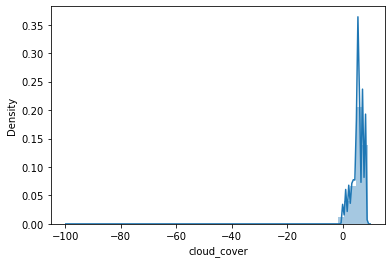

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


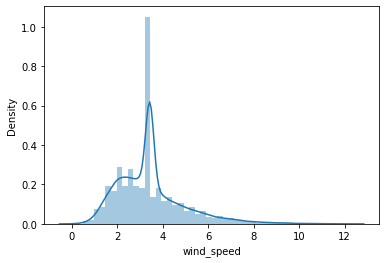

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


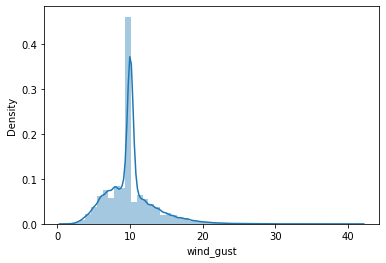

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


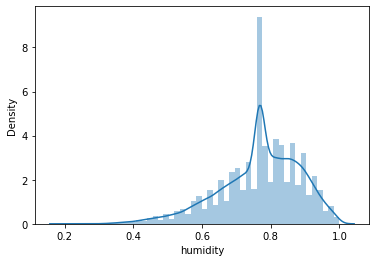

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


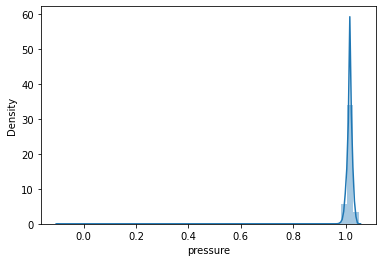

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


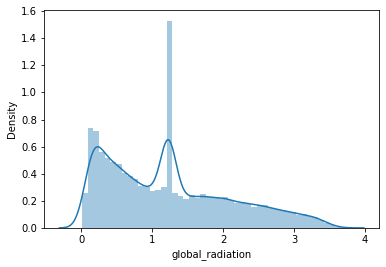

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


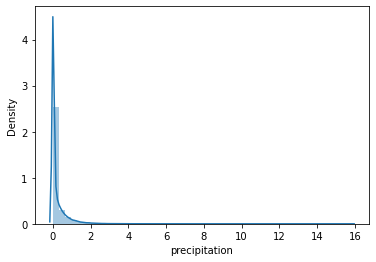

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


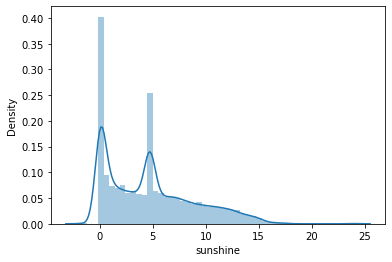

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


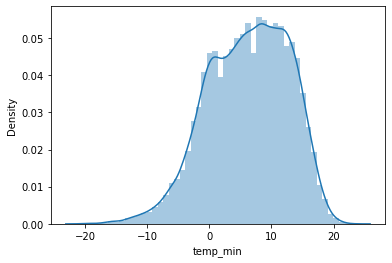

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


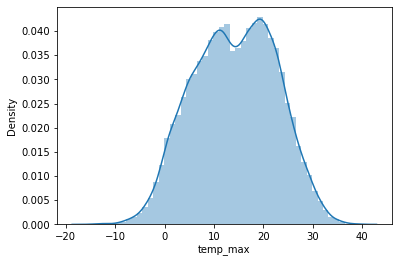

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


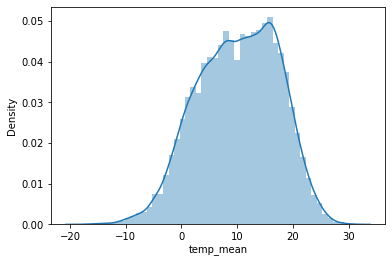

In [34]:
def plot_num(df):
    for col in df.columns:
        sns.distplot(a=df[col])
        plt.show()
    return None

plot_num(numerical)

# Remove outliers

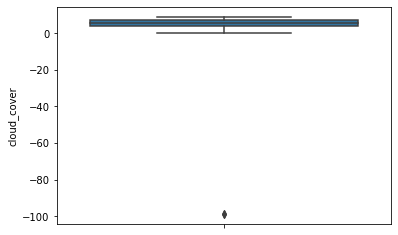

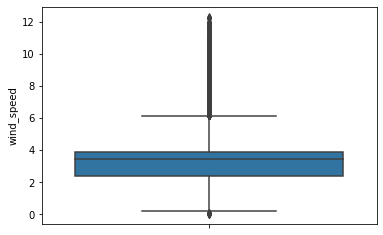

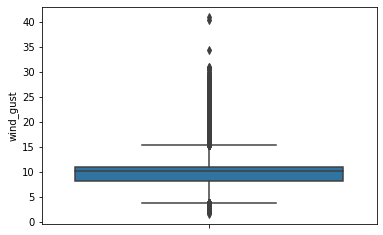

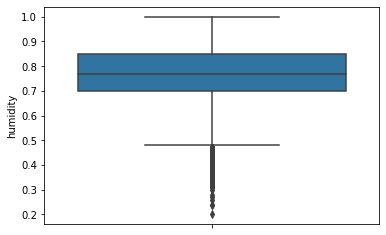

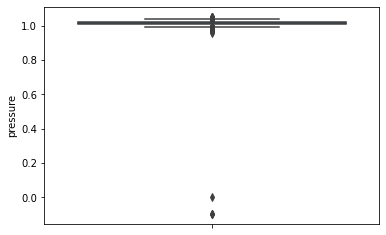

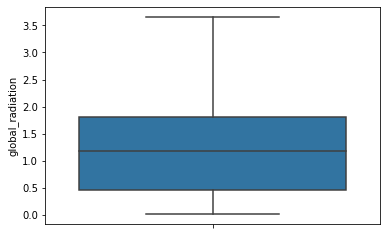

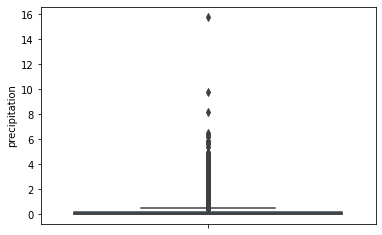

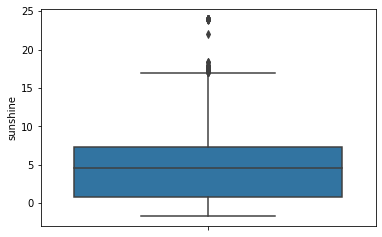

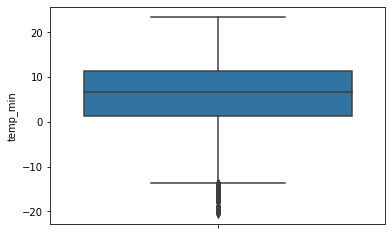

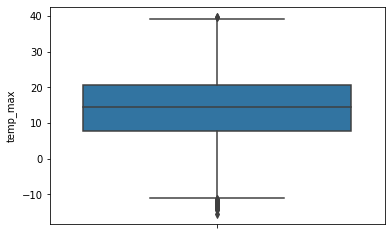

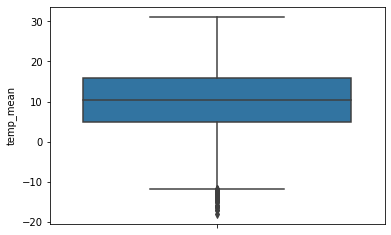

In [35]:
# Observe outliers if any
def outlier(df):
    for col in df.columns:
        sns.boxplot(y=df[col])
        plt.show()
    return None

outlier(numerical)

In [36]:
# Pressure and cloud_cover columns have outliers. The other columns do not have so many outliers.

In [37]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
cloud_cover,36540.0,5.317460,2.140716,-99.000,4.0000,5.317460,7.0000,9.0000
wind_speed,36540.0,3.429115,1.486621,0.000,2.4000,3.429115,3.9000,12.3000
wind_gust,36540.0,10.060869,3.249453,1.500,8.1000,10.060869,11.0000,41.0000
humidity,36540.0,0.768370,0.117105,0.200,0.7000,0.770000,0.8500,1.0000
pressure,36540.0,1.015051,0.014896,-0.099,1.0101,1.015051,1.0209,1.0512
global_radiation,36540.0,1.224291,0.875732,0.010,0.4700,1.190000,1.8100,3.6600
precipitation,36540.0,0.206858,0.452086,0.000,0.0000,0.010000,0.2100,15.8000
sunshine,36540.0,4.697443,4.157914,-1.700,0.8000,4.600000,7.3000,24.0000
temp_min,36540.0,6.243872,6.526374,-20.700,1.4000,6.700000,11.4000,23.5000
temp_max,36540.0,14.164319,8.359135,-15.600,7.9000,14.400000,20.6000,39.8000


In [38]:
numerical.columns

Index(['cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure',
       'global_radiation', 'precipitation', 'sunshine', 'temp_min', 'temp_max',
       'temp_mean'],
      dtype='object')

In [39]:
def value_count(df):
    for column in df.columns:
        print(column, ":", len(df[column].unique())) # number of unique value for each column
    
value_count(numerical)

cloud_cover : 12
wind_speed : 123
wind_gust : 272
humidity : 77
pressure : 693
global_radiation : 365
precipitation : 369
sunshine : 186
temp_min : 402
temp_max : 494
temp_mean : 441


In [40]:
print("Old shape: ", numerical.shape)

Old shape:  (36540, 11)


In [41]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]
    
    return data

In [42]:
pressure_outliers = outliers(numerical["pressure"])
cloud_cover_outliers = outliers(numerical["cloud_cover"])

In [43]:
len(pressure_outliers)

8

In [44]:
pressure_outliers

25606    0.9590
26361    0.9662
28211    0.9655
29255   -0.0990
30016    0.9687
31942   -0.0990
32069   -0.0990
36172    0.0003
Name: pressure, dtype: float64

In [45]:
len(cloud_cover_outliers)

2

In [46]:
cloud_cover_outliers

32359   -99.0
32695   -99.0
Name: cloud_cover, dtype: float64

In [47]:
weather.shape

(36540, 14)

In [48]:
numerical.shape

(36540, 11)

In [49]:
categorical.shape

(36540, 2)

In [50]:
to_drop = pressure_outliers.index | cloud_cover_outliers.index

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_755/3664477745.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_drop = pressure_outliers.index | cloud_cover_outliers.index


In [51]:
clean_numerical = numerical.drop(to_drop).reset_index(drop = True)
clean_numerical.isna().sum()

cloud_cover         0
wind_speed          0
wind_gust           0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temp_min            0
temp_max            0
temp_mean           0
dtype: int64

In [52]:
clean_numerical.iloc[:,0:11].round(2)

,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,7.00,2.5,8.00,0.97,1.02,0.11,0.10,0.0,3.5,8.1,6.1
1,8.00,3.7,9.00,0.97,1.03,0.11,0.00,0.0,5.4,8.7,7.3
2,8.00,6.1,13.00,0.94,1.02,0.11,0.45,0.0,6.4,9.6,8.4
3,7.00,3.8,15.00,0.94,1.01,0.11,1.09,0.0,4.3,9.4,6.4
4,3.00,4.0,12.00,0.90,1.02,0.48,0.00,6.5,1.4,7.4,4.4
...,...,...,...,...,...,...,...,...,...,...,...
36525,5.32,3.7,10.06,0.95,1.00,0.22,1.50,4.7,1.8,10.6,6.2
36526,5.32,5.3,10.06,0.89,1.00,0.24,0.40,4.7,6.2,14.5,10.4
36527,5.32,3.8,10.06,0.88,0.99,0.24,1.00,4.7,8.7,11.3,10.0
36528,5.32,4.2,10.06,0.88,0.99,0.58,0.02,4.7,6.2,10.9,8.5


In [53]:
print("New shape: ",clean_numerical.shape)

New shape:  (36530, 11)


In [54]:
# Categorical dataframe
clean_categorical = categorical.drop(to_drop).reset_index(drop = True)

In [55]:
clean_categorical.shape

(36530, 2)

In [56]:
# date column
date = weather['date']

In [57]:
date.shape

(36540,)

In [58]:
clean_date = date.drop(to_drop).reset_index(drop = True)

In [59]:
clean_date.shape

(36530,)

# Concat clean dataframes

In [60]:
# Concat cleaned version of date, categorical, and numerical dataframes.
weather_clean = pd.concat([clean_date, clean_categorical, clean_numerical.iloc[:,0:11].round(2)], axis=1)
weather_clean.shape

(36530, 14)

In [61]:
weather_clean.head(5)

,date,month,city,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
0,2000-01-01,1,De bilt,7.0,2.5,8.0,0.97,1.02,0.11,0.10,0.0,3.5,8.1,6.1
1,2000-01-02,1,De bilt,8.0,3.7,9.0,0.97,1.03,0.11,0.00,0.0,5.4,8.7,7.3
2,2000-01-03,1,De bilt,8.0,6.1,13.0,0.94,1.02,0.11,0.45,0.0,6.4,9.6,8.4
3,2000-01-04,1,De bilt,7.0,3.8,15.0,0.94,1.01,0.11,1.09,0.0,4.3,9.4,6.4
4,2000-01-05,1,De bilt,3.0,4.0,12.0,0.90,1.02,0.48,0.00,6.5,1.4,7.4,4.4


In [62]:
weather_clean.tail(5)

,date,month,city,cloud_cover,wind_speed,wind_gust,humidity,pressure,global_radiation,precipitation,sunshine,temp_min,temp_max,temp_mean
36525,2009-12-28,12,Tours,5.32,3.7,10.06,0.95,1.00,0.22,1.50,4.7,1.8,10.6,6.2
36526,2009-12-29,12,Tours,5.32,5.3,10.06,0.89,1.00,0.24,0.40,4.7,6.2,14.5,10.4
36527,2009-12-30,12,Tours,5.32,3.8,10.06,0.88,0.99,0.24,1.00,4.7,8.7,11.3,10.0
36528,2009-12-31,12,Tours,5.32,4.2,10.06,0.88,0.99,0.58,0.02,4.7,6.2,10.9,8.5
36529,2010-01-01,1,Tours,5.32,3.4,10.06,0.86,1.00,0.11,0.00,4.7,-0.7,1.8,0.5


In [63]:
weather_clean.dtypes

date                datetime64[ns]
month                       object
city                        object
cloud_cover                float64
wind_speed                 float64
wind_gust                  float64
humidity                   float64
pressure                   float64
global_radiation           float64
precipitation              float64
sunshine                   float64
temp_min                   float64
temp_max                   float64
temp_mean                  float64
dtype: object

In [64]:
weather = weather_clean

# Create database for each city

In [66]:
# These are exported from Python and imported to Mysql.

dusseldorf = weather[(weather['city'].isin(['Dusseldorf']))]
kassel = weather[(weather['city'].isin(['Kassel']))]
dresden = weather[(weather['city'].isin(['Dresden']))]
muenchen = weather[(weather['city'].isin(['Muenchen']))]
de_bilt = weather[(weather['city'].isin(['De_bilt']))]
heathrow = weather[(weather['city'].isin(['Heathrow']))]
maastricht = weather[(weather['city'].isin(['Maastricht']))]
oslo = weather[(weather['city'].isin(['Oslo']))]
stockholm = weather[(weather['city'].isin(['Stockholm']))]
tours = weather[(weather['city'].isin(['Tours']))]

# Store clean data in .csv file

In [67]:
# The csv. files above are imported into Mysql.
weather.to_csv('all_cities.csv')
dusseldorf.to_csv('dusseldorf.csv')
kassel.to_csv('kassel.csv')
dresden.to_csv('dresden.csv')
muenchen.to_csv('muenchen.csv')
de_bilt.to_csv('de_bilt.csv')
heathrow.to_csv('heathrow.csv')
maastricht.to_csv('maastricht.csv')
oslo.to_csv('oslo.csv')
stockholm.to_csv('stockholm.csv')
tours.to_csv('tours.csv')

# Store clean data in .xlsx file

In [69]:
# Excel files are created to import them into Tableau.
dusseldorf.to_excel('dusseldor2.xlsx', index=False)
muenchen.to_excel('muenchen2.xlsx', index=False)
kassel.to_excel('kassel2.xlsx', index=False)
dresden.to_excel('dresden2.xlsx', index=False)
data.to_excel('data.xlsx', index=False)